# custom-svm
This project aims at providing a custom implementation of Support Vector Machine, as part of the **Combinatorial Decision Making and Optimization** course of the **Master in Artificial Intelligence** (*Alma Mater Studiorum*).  
This implementation is based on the **constrained non-linear optimization** of an objective function, i.e. the margin around the hyperplane which separates two clusters.
#### Authors:
 - Mattia Orlandi
 - Lorenzo Mario Amorosa

## Premises
The implementations of the SVM and of the MulticlassSVM are contained in the `svm.py` and `multiclass_svm.py` modules, respectively; they provide several functionalities:
- fitting of an SVM model for a binary classification task;
- kernel functions in order to correctly classify non-linearly separable data;
- soft margin in order to correctly classify semi-linearly separable data;
- plotting of the dataset and of the separating hyperplane along multiple dimensions;
- support to multi-class classification using an One-Versus-One approach.

First of all, import the required libraries, in particular the custom implementations of SVM contained in the `svm.py` and `multiclass_svm.py` modules and the dataset generator (`sample_data_generator.py`).  
Set some useful constants, like the random state `RND`, the number of samples `N_SAMP` and the number of features `N_FEAT`.

In [1]:
from svm import SVM
from multiclass_svm import MulticlassSVM
from data.sample_data_generator import *
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from typing import Union
%matplotlib inline
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

RND = 42
N_SAMP = 200
N_FEAT = 2

Moreover, define a useful function which, given a `SVM` object, the training and the test sets, 
performs the following operations, :
- `SVM.fit(...)` on the training set;
- `SVM.predict(...)` on the test set;
- computes the accuracy score;
- plots the result (only for the custom implementation of svm).

In [2]:
def fit_and_predict(svm: Union[SVM, SVC, MulticlassSVM],
                    X_train: np.ndarray,
                    X_test: np.ndarray,
                    y_train: np.ndarray,
                    y_test: np.ndarray,
                    x_min: Optional[float] = None,
                    x_max: Optional[float] = None,
                    y_min: Optional[float] = None,
                    y_max: Optional[float] = None,
                    verbosity: Optional[int] = 1,
                    is_binary_custom_svm: Optional[bool] = True):
    if is_binary_custom_svm:
        svm.fit(X_train, y_train, verbosity)
    else:
        svm.fit(X_train, y_train)
    y_pred = svm.predict(X_train)
    print('Accuracy on the training set: {0:.2f}%'.format(accuracy_score(y_train, y_pred) * 100))
    y_pred = svm.predict(X_test)
    print('Accuracy on the test set: {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    if is_binary_custom_svm:
        svm.plot2D(X_train, y_train, x_min, x_max, y_min, y_max)
        

## 1. Sample datasets

Test the SVM on a linearly separable dataset.

3 support vectors found out of 150 data points
1) X: [0.296 6.211]	y: -1	lambda: 0.71
2) X: [1.999 5.636]	y: 1	lambda: 0.34
3) X: [1.214 4.681]	y: 1	lambda: 0.37
Bias of the hyper-plane: 3.424
Weights of the hyper-plane: [ 0.919 -0.756]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


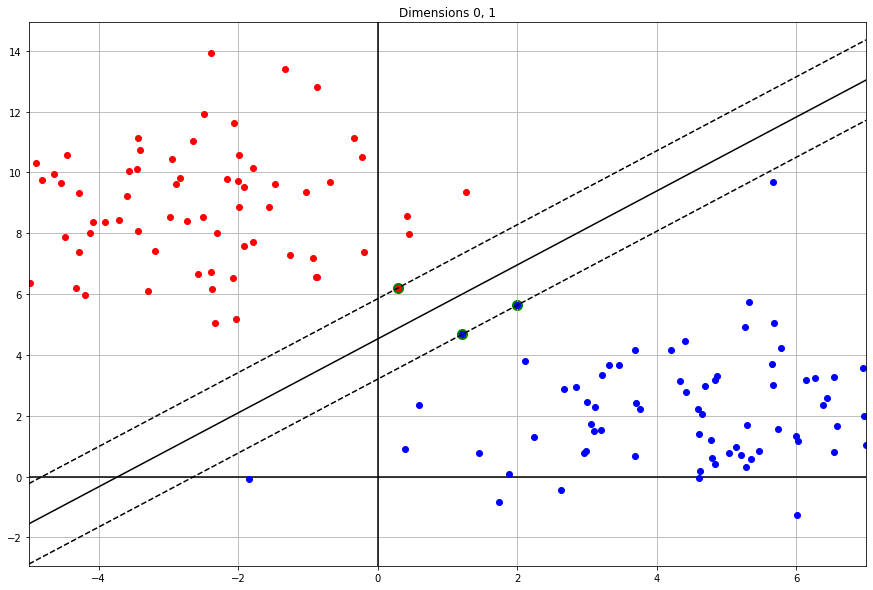

In [3]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = linear_data_generator(n_samples=N_SAMP,
                                                                         n_features=N_FEAT,
                                                                         random_state=RND)
svm_lin = SVM(C=None)
fit_and_predict(svm_lin, 
                X_train_lin, X_test_lin, 
                y_train_lin, y_test_lin, 
                x_min=-5., x_max=7., verbosity=2)

As it can be seen, the SVM computes 3 support vectors, the 2 weights and the bias of the hyperplane (which is in fact a line in this 2D case), and predicts the label of a test set with an accuracy of 100%. In the above plot it is possible to see the three support vectors (circled in green), the separating line (in solid black) and the two margins (dotted black lines).

Then, test the SVM on the same dataset, but fitting only on the support vectors found.

3 support vectors found out of 3 data points
Bias of the hyper-plane: 3.424
Weights of the hyper-plane: [ 0.919 -0.756]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


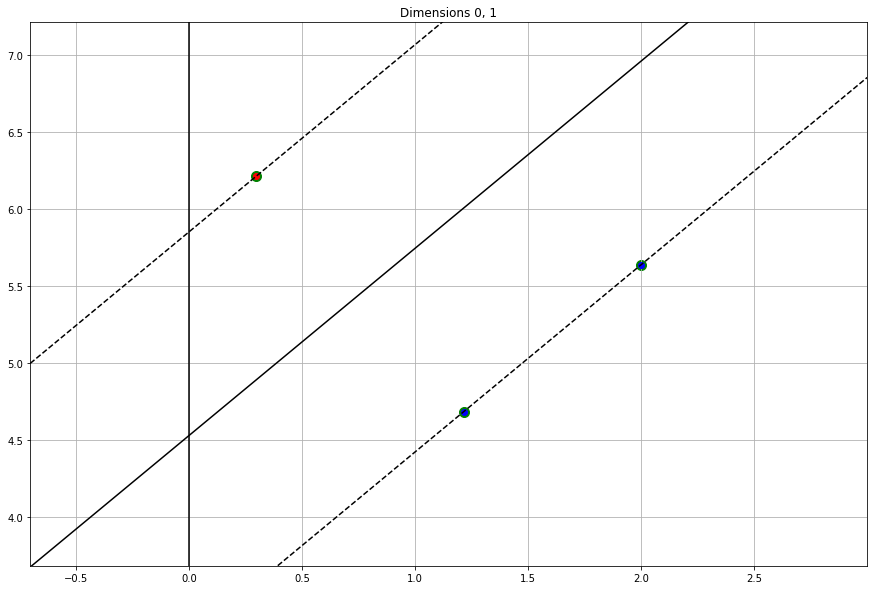

In [4]:
X_sv_lin, y_sv_lin = svm_lin.sv_X, svm_lin.sv_y
svm_lin = SVM(C=None)
fit_and_predict(svm_lin,
                X_sv_lin, X_test_lin,
                y_sv_lin, y_test_lin)

As expected the weights and the bias of the hyperplane is the same as in the previous case; the reason is that the support vectors are the only vectors of the dataset having strictly positive lagrangian multipliers, and thus they are the only vectors influencing the classifier.

Test the SVM on a semi-linearly separable dataset which contains outliers.

3 support vectors found out of 150 data points
1) X: [ 0.801 -1.052]	y: 1	lambda: 5.12
2) X: [ 1.076 -0.718]	y: 1	lambda: 9.88
3) X: [ 0.7 -0.6]	y: -1	lambda: 15.00
Bias of the hyper-plane: -6.048
Weights of the hyper-plane: [ 4.229 -3.479]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


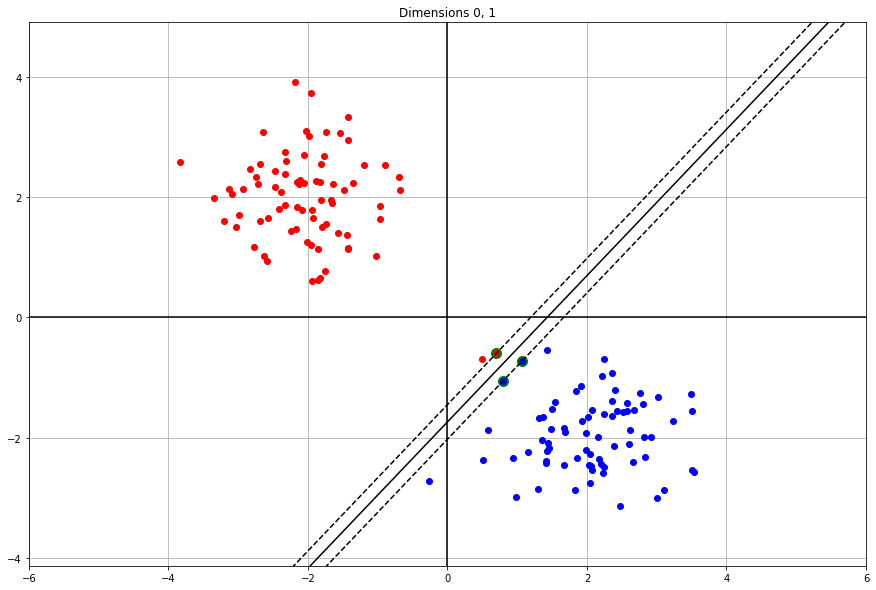

In [5]:
X_train_slin, X_test_slin, y_train_slin, y_test_slin = semi_linear_data_generator(n_samples=N_SAMP,
                                                                                  n_features=N_FEAT,
                                                                                  random_state=RND)
svm_slin = SVM(C=None)
fit_and_predict(svm_slin,
                X_train_slin, X_test_slin,
                y_train_slin, y_test_slin,
                x_min=-6., x_max=6., verbosity=2)

Due to red outliers, the separating hyperplane is very near to the blue cluster and it has a small margin, leading to a model which is not robust; in fact, if new data has a high variance, some blue points could lie above the hyperplane and thus be wrongly classified. This is due to the use of a hard margin, not effective in the presence of outliers.

Test the SVM on the same dataset but using a soft margin.

8 support vectors found out of 150 data points
1) X: [ 1.427 -0.535]	y: 1	lambda: 0.10
2) X: [ 0.801 -1.052]	y: 1	lambda: 0.10
3) X: [ 1.076 -0.718]	y: 1	lambda: 0.10
4) X: [-0.269 -2.717]	y: 1	lambda: 0.06
5) X: [-1.018  1.019]	y: -1	lambda: 0.10
6) X: [ 0.7 -0.6]	y: -1	lambda: 0.10
7) X: [-1.854  0.628]	y: -1	lambda: 0.06
8) X: [ 0.5 -0.7]	y: -1	lambda: 0.10
Bias of the hyper-plane: -0.306
Weights of the hyper-plane: [ 0.408 -0.405]
Accuracy on the training set: 98.67%
Accuracy on the test set: 100.00%


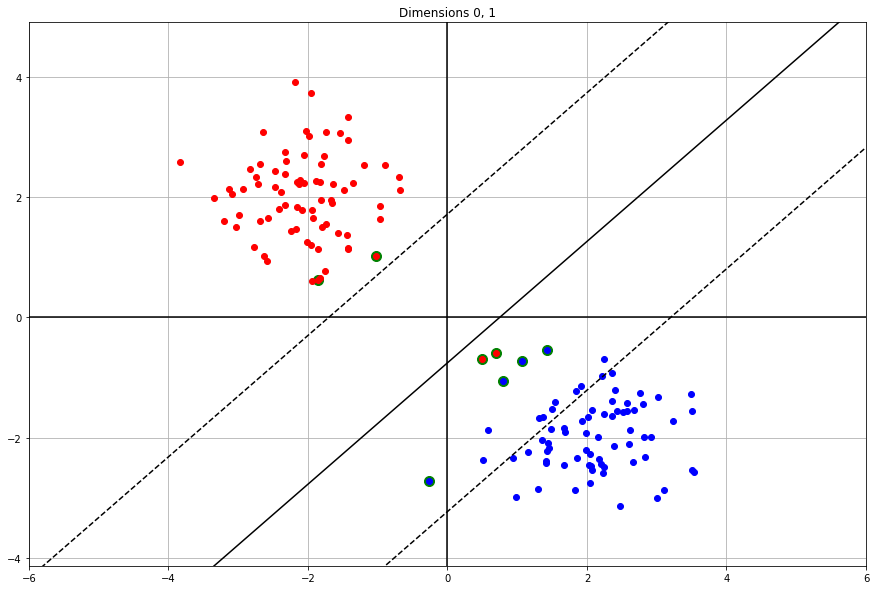

In [6]:
svm_slin = SVM(C=0.1)
fit_and_predict(svm_slin,
                X_train_slin, X_test_slin,
                y_train_slin, y_test_slin,
                x_min=-6., x_max=6., verbosity=2)

Thanks to the soft margin, the two red outliers are ignored and the separating hyperplane is placed further from the blue cluster than before, and with a much larger margin.  
In the next use cases, soft margin will be used (by default, $C=1$).

Test the SVM on a non-linear separable dataset using a polynomial kernel function.

148 support vectors found out of 150 data points
Bias of the hyper-plane: 0.044
Weights of the hyper-plane: None
Accuracy on the training set: 61.33%
Accuracy on the test set: 50.00%


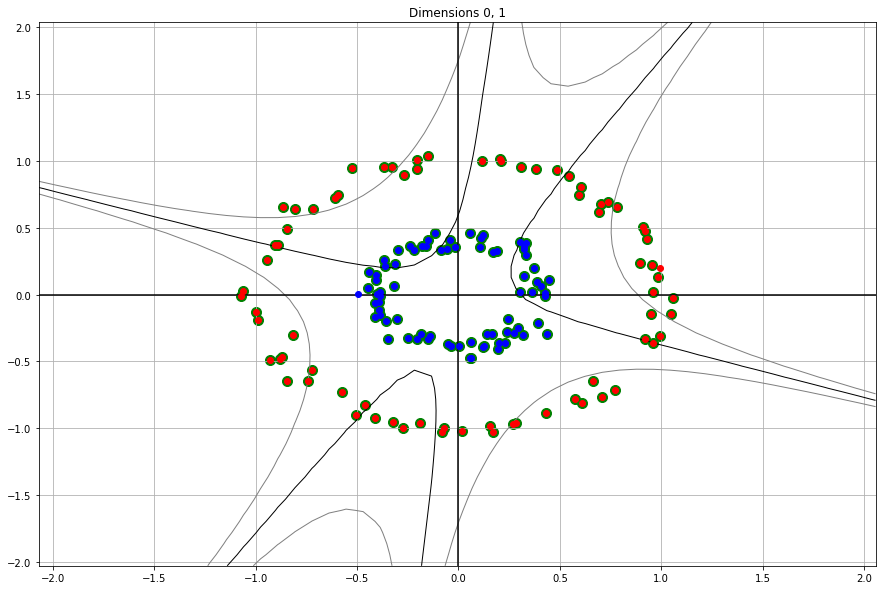

In [7]:
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = non_linear_data_generator(n_samples=N_SAMP,
                                                                                         random_state=RND)
svm_poly = SVM(kernel='poly', deg=3)
fit_and_predict(svm_poly,
                X_train_nonlin, X_test_nonlin,
                y_train_nonlin, y_test_nonlin,
                verbosity=1)

First of all, since kernel functions are used it is not possible to compute the weights of the "hyperplane" (since to do that the mapping of $X$ in the new space must be known).  
Secondly, the polynomial kernel function does not seem adequate since the accuracy is really low; moreover, too many support vectors are found, and in the above plot it can be seen that the "hyperplane" does not correctly separate the clusters. For this dataset, a radial basis function must be used as kernel.

23 support vectors found out of 150 data points
1) X: [0.305 0.393]	y: 1	lambda: 1.00
2) X: [-0.346 -0.334]	y: 1	lambda: 1.00
3) X: [-0.495  0.004]	y: 1	lambda: 1.00
4) X: [ 0.574 -0.781]	y: -1	lambda: 0.11
5) X: [-0.271  0.894]	y: -1	lambda: 1.00
6) X: [0.333 0.388]	y: 1	lambda: 1.00
7) X: [ 0.059 -0.473]	y: 1	lambda: 1.00
8) X: [-0.188 -0.962]	y: -1	lambda: 0.58
9) X: [-0.115  0.462]	y: 1	lambda: 0.31
10) X: [-0.814 -0.304]	y: -1	lambda: 1.00
11) X: [ 0.158 -0.986]	y: -1	lambda: 0.15
12) X: [0.695 0.62 ]	y: -1	lambda: 0.85
13) X: [-0.723 -0.565]	y: -1	lambda: 0.34
14) X: [-0.89   0.371]	y: -1	lambda: 0.86
15) X: [0.322 0.358]	y: 1	lambda: 0.35
16) X: [0.596 0.743]	y: -1	lambda: 0.58
17) X: [ 0.947 -0.142]	y: -1	lambda: 0.12
18) X: [ 0.056 -0.472]	y: 1	lambda: 0.02
19) X: [0.893 0.234]	y: -1	lambda: 0.63
20) X: [-0.574 -0.732]	y: -1	lambda: 0.31
21) X: [ 0.663 -0.65 ]	y: -1	lambda: 1.00
22) X: [ 0.438 -0.293]	y: 1	lambda: 1.00
23) X: [-0.44  0.17]	y: 1	lambda: 0.84
Bias of the hyper-p

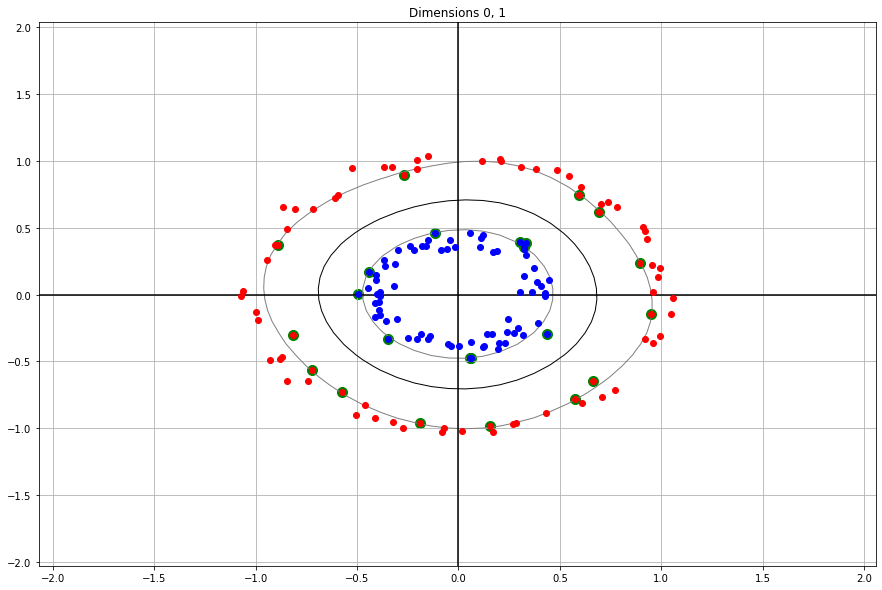

In [8]:
svm_nonlin = SVM(kernel='rbf')
fit_and_predict(svm_nonlin,
                X_train_nonlin, X_test_nonlin,
                y_train_nonlin, y_test_nonlin,
                verbosity=2)

Thanks to the radial basis function, the accuracy is now 100% and the "hyperplane" correctly separates the two clusters.

As in the linear case, test the SVM on the same dataset, but fitting only on the support vectors found.

23 support vectors found out of 23 data points
Bias of the hyper-plane: -1.045
Weights of the hyper-plane: None
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


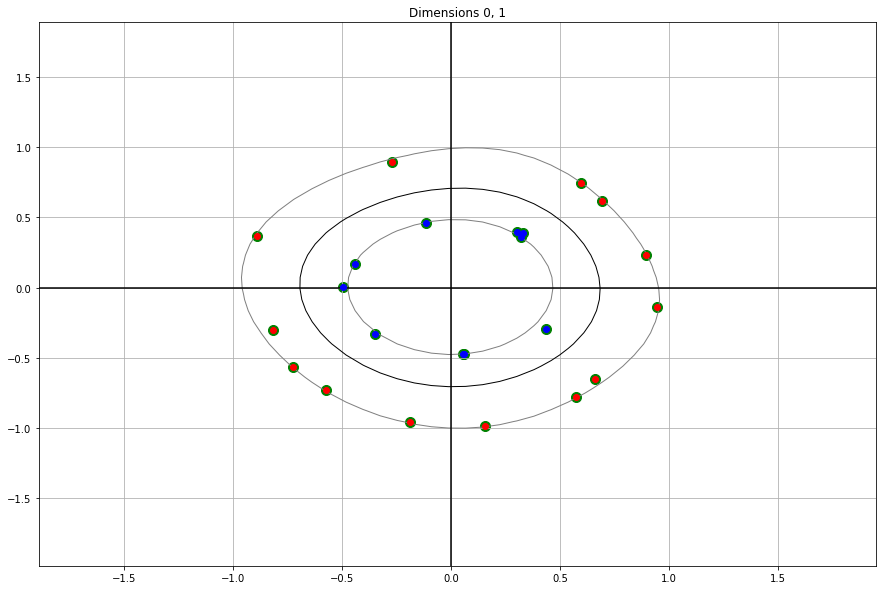

In [9]:
X_sv_nonlin, y_sv_nonlin = svm_nonlin.sv_X, svm_nonlin.sv_y
svm_nonlin = SVM(kernel='rbf')
fit_and_predict(svm_nonlin,
                X_sv_nonlin, X_test_nonlin,
                y_sv_nonlin, y_test_nonlin)

Once again fitting the model on the support vectors only does not change the result.

## 2. Sensor dataset

The following SVM models are tested on a **dataset** constructed by simulating **measurements** of **distances** between **sensors** and **IoT devices** in a building.  

The **building** is **composed of** a set of **rooms** on several floors, which can be automatically generated or can be given in input from the user. Concerning the automatic generation, it is possible to ask the generator to be more prone to produce a higher number of rooms per floor and vice-versa.  
In each room  it can be placed an arbitrarly number of **sensors**, either manually or automatically.  

The **data collection workflow** is as follows: when a **device** placed in a room **emit a signal**, the **intensity measured by a sensor** is inversely proportional to the square of the distance between the device and the sensor itself; then a Gaussian error is summed to the measured value.   
It is possible to **attach** to the **sample** either the **room** in which it is collected or its spatial position **coordinates**, in this way the dataset can be useful either for **classificaton** tasks or **regression** tasks as well. The implementation of the generator can be found in the python module named `sensor_data_generator.py`.

**In this notebook**, it is proposed a classification task: the SVM are trained to **predict the room** in which the device is located **given** the **intensities measured by sensors**.

Utility function to show a room.

In [10]:
def show_room(img_name: str):
    img = plt.imread(img_name)
    plt.figure(figsize = (15,15))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

Firstly, it is addressed a **binary classification** task. It is given a floor of a building with **2 rooms** (blue and red) and **5 sensors**, which are represented in the following figure with numbers from 0 to 4 in whites circles.  
A dataset is sampled from this building following the steps described previously. Each sample ia labelled with the room where it is collected.

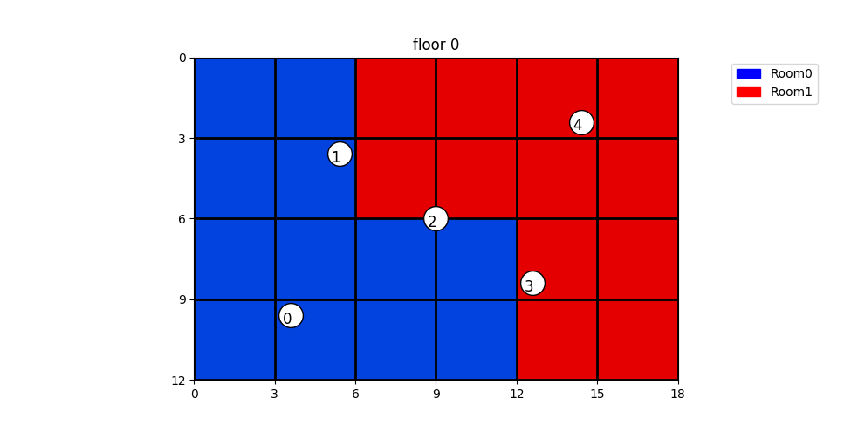

In [11]:
show_room('data/data_png/2_rooms.png')

Utility function to read and process the dataset.

In [12]:
def read_dataset(f_name: str, is_multi: Optional[bool] = False):
    X_raw = []
    y_raw = []
    with open(f_name, "r") as file:
        for line in file:
            features = line.split(',')[:-1]
            X_raw.append(features)
            y_raw.append(line.split(',')[-1])
    X = np.array(X_raw).astype(np.float)
    y = np.array(y_raw).astype(np.float)
    if not is_multi:
        y = np.fromiter((-1 if yi == 0 else 1 for yi in y), y.dtype)
        
    return train_test_split(X, y, test_size=0.2, random_state=RND)

Now our custom `SVM` is tested on this dataset. A radial basis kernel is chosen since the data are inherently non-linear.

The execution of the following cell may require some minutes since it plots the dataset and the "hyperplane" along every possible combination of dimensions, e.g. (0, 1), (0, 2), ..., (3,4).

477 support vectors found out of 800 data points
Bias of the hyper-plane: 0.023
Weights of the hyper-plane: None
Accuracy on the training set: 86.75%
Accuracy on the test set: 86.50%


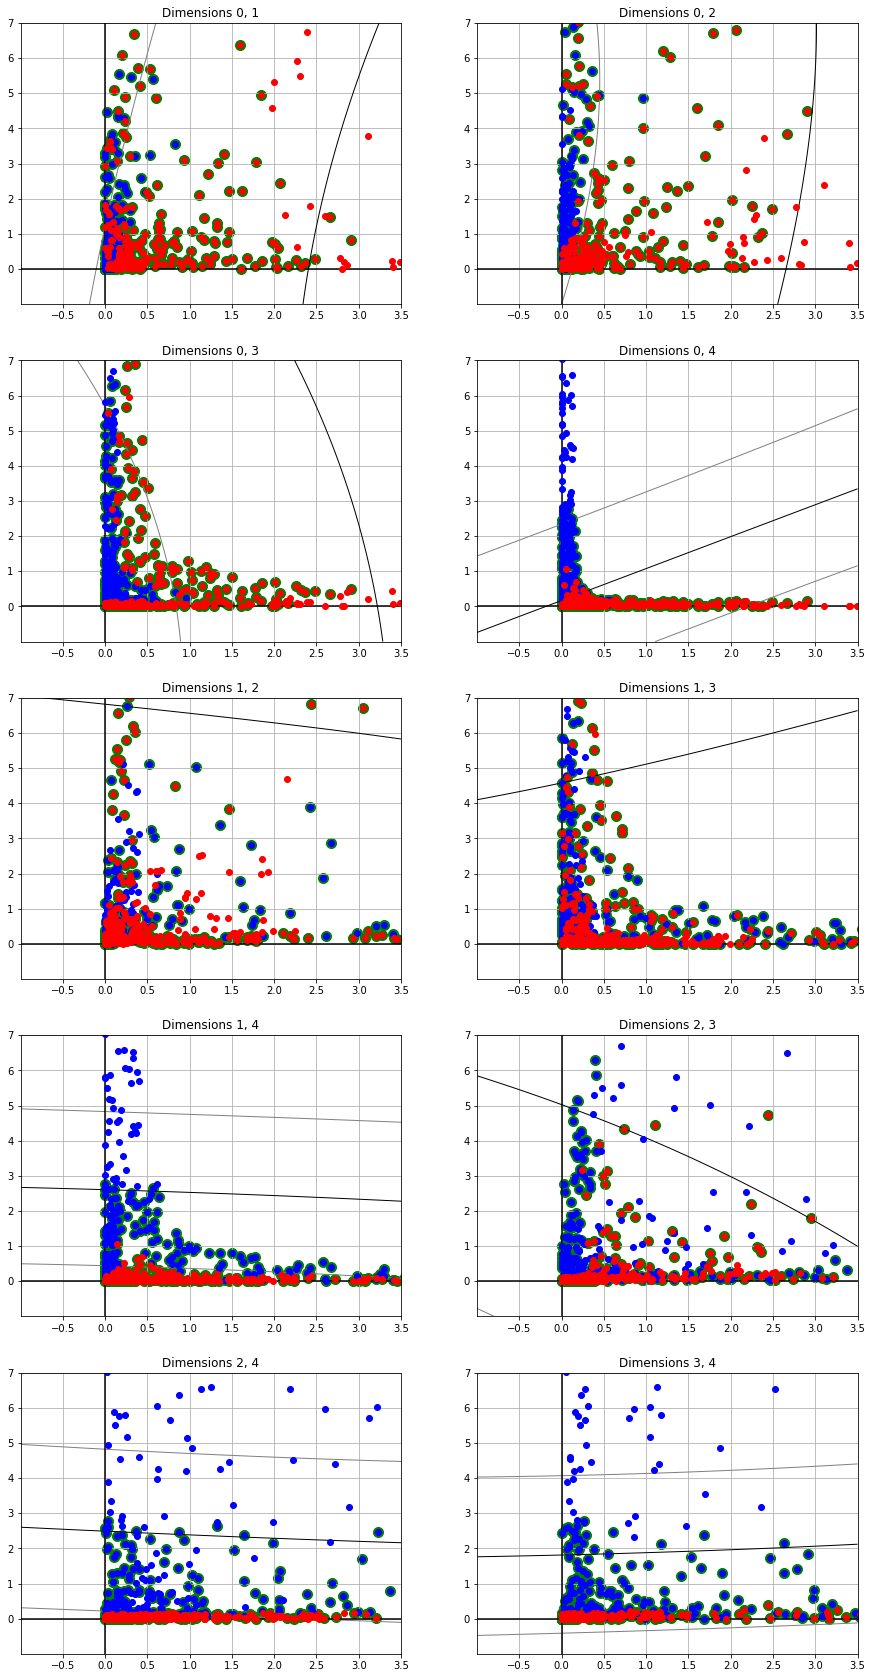

In [13]:
f_name_bin ="data/data_2_rooms.txt"
X_train_binsens, X_test_binsens, y_train_binsens, y_test_binsens = read_dataset(f_name_bin)
svm_binsens = SVM(kernel="rbf")
fit_and_predict(svm_binsens,
                X_train_binsens, X_test_binsens,
                y_train_binsens, y_test_binsens,
                x_min=0., x_max=3.5, y_min=0., y_max=7.)

As it can be seen, the **accuracy** is **good**, but it can still be improved, for example by displacing the sensors in different way or varying kernel functions. Any way, the evaluation of tuning strategies is out of scope now.  
The **plot** can give us **further insight** on the performance: the sensors called "0" and "4" seem to be the most effective to discriminate between the rooms, in fact the hyperplane between them correctly separates the two clusters, meanwhile the sensor named "2" seems to be almost irrelevant.

Comparison of the previous result with `sklearn.SVC`, using the same radial basis kernel (so that runtime parameters are the same in both cases). The evidence shows that the performance of the 2 classifiers are almost the same. 

In [14]:
svc = SVC(kernel="rbf", gamma="scale")
fit_and_predict(svc,
                X_train_binsens, X_test_binsens,
                y_train_binsens, y_test_binsens,
                is_binary_custom_svm=False)
print('{0:d} support vectors found out of {1:d} data points'.format(len(svc.support_), len(X_train_binsens)))

Accuracy on the training set: 85.88%
Accuracy on the test set: 86.00%
459 support vectors found out of 800 data points


Now it is addressed a **multiclass classification** task. It is given a building of **2 floors** composed of **10 rooms** in total. Inside the building **20 sensors** are placed at different height, and they are represented in the following figures with numbers in whites circles as in the previous case.  
A dataset is sampled from this building following the already discussed steps and each sample ia labelled with the room where it is collected.

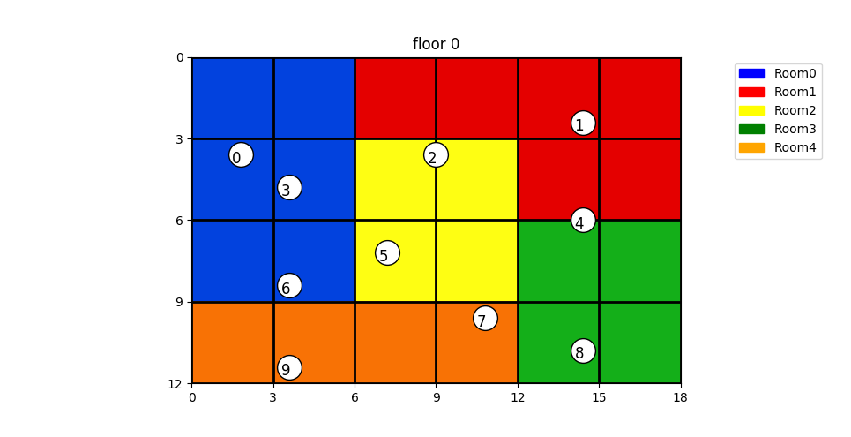

In [15]:
show_room('data/data_png/10_rooms_floor0.png')

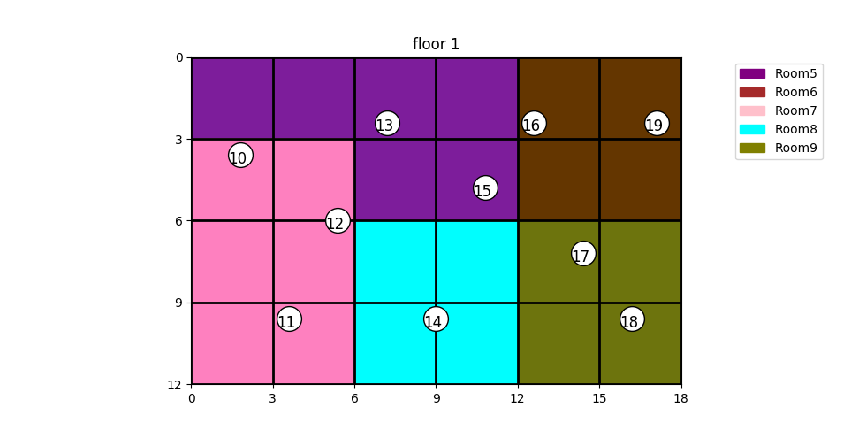

In [16]:
show_room('data/data_png/10_rooms_floor1.png')

Here it follows the test of our `MulticlassSVM` on the dataset sampled from the previous rooms. It is choosed a radial basis kernel since the data are inherently non-linear, as already done in the previous case.

The execution of the following cell may require some minutes (about 20 minutes according to our test) due to the size of the dataset (8000 vectors), the number of features (20) and the number of binary SVM needed (45 for 10 classes).

In [17]:
f_name_mul ="data/data_10_rooms.txt"
X_train_mulsens, X_test_mulsens, y_train_mulsens, y_test_mulsens = read_dataset(f_name_mul, is_multi=True)
svm_mulsens = MulticlassSVM(kernel="rbf")
fit_and_predict(svm_mulsens,
                X_train_mulsens, X_test_mulsens,
                y_train_mulsens, y_test_mulsens,
                is_binary_custom_svm=False)


4363 support vectors found out of 8000 data points
Accuracy on the training set: 81.35%
Accuracy on the test set: 80.85%


Comparison of the previous result with `sklearn.SVC` for multiclassification. It is used again a radial basis kernel and the strategy one-versus-one for multiclassification is specified (so that runtime parameters are the same in both cases). The evidence shows that the performance of the 2 classifiers are almost the same in this case as well. 

In [18]:
svc = SVC(kernel="rbf", gamma="scale", decision_function_shape='ovo')
fit_and_predict(svc,
                X_train_mulsens, X_test_mulsens,
                y_train_mulsens, y_test_mulsens,
                is_binary_custom_svm=False)
print('{0:d} support vectors found out of {1:d} data points'.format(len(svc.support_), len(X_train_mulsens)))

Accuracy on the training set: 85.42%
Accuracy on the test set: 84.90%
4359 support vectors found out of 8000 data points
